In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [12]:
import numpy
import joblib
import sklearn

print("Joblib version:", joblib.__version__)
print("Numpy version:", numpy.__version__)
print("Sklearn version:", sklearn.__version__)


Joblib version: 1.4.2
Numpy version: 2.2.3
Sklearn version: 1.6.1


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:

pip install scikit-learn==1.6.1

Note: you may need to restart the kernel to use updated packages.


In [3]:
df=pd.read_csv("analysis_data.csv")

In [4]:
df

,locality_name,region_name,price,value_per_sqft,area,construction_status,house_type,total_rooms,total_beds,new_resale,age
0,Tarwala Nagar,Nashik,8499000.0,3761,2260,Under Construction,Apartment,6,4,New,-1.0
1,Dombivali,Mumbai,6790000.0,13580,500,Under Construction,Apartment,4,2,New,0.0
2,Wagholi,Pune,6030000.0,7811,773,Under Construction,Apartment,5,3,New,-3.0
3,Ambegaon Budruk,Pune,3537000.0,7417,477,Ready to move,Apartment,3,1,New,0.5
4,Dombivali,Mumbai,9500000.0,10359,917,Under Construction,Apartment,5,3,New,-3.0
...,...,...,...,...,...,...,...,...,...,...,...
191269,Pirangut,Pune,8060000.0,8511,947,Under Construction,Apartment,5,3,New,-4.0
191270,Pirangut,Pune,4000000.0,8948,448,Under Construction,Apartment,3,1,New,-4.0
191271,Pirangut,Pune,16800000.0,8931,1887,Under Construction,Independent House,6,4,New,-4.0
191272,Pirangut,Pune,7500000.0,9778,768,Under Construction,Apartment,5,3,New,-4.0


In [5]:
df['house_type'].unique()

array(['Apartment', 'Independent House', 'Villa', 'Studio Apartment',
       'Independent Floor', 'Penthouse'], dtype=object)

In [34]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# df['house_type_label'] = le.fit_transform(df['house_type'])

# print(df[['house_type', 'house_type_label']])


In [6]:
df['age']=df['age'].abs()

<Axes: ylabel='price'>

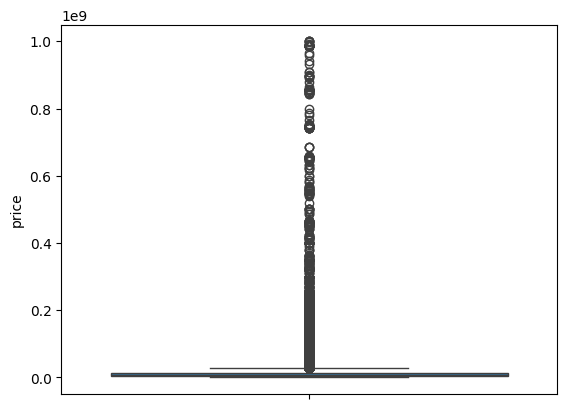

In [7]:
sns.boxplot(df['price'] )

In [8]:
df['price'].skew()

np.float64(17.377036715287897)

In [9]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


In [10]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


In [11]:
df_no_outliers

,locality_name,region_name,price,value_per_sqft,area,construction_status,house_type,total_rooms,total_beds,new_resale,age
0,Tarwala Nagar,Nashik,8499000.0,3761,2260,Under Construction,Apartment,6,4,New,1.0
1,Dombivali,Mumbai,6790000.0,13580,500,Under Construction,Apartment,4,2,New,0.0
2,Wagholi,Pune,6030000.0,7811,773,Under Construction,Apartment,5,3,New,3.0
3,Ambegaon Budruk,Pune,3537000.0,7417,477,Ready to move,Apartment,3,1,New,0.5
4,Dombivali,Mumbai,9500000.0,10359,917,Under Construction,Apartment,5,3,New,3.0
...,...,...,...,...,...,...,...,...,...,...,...
191269,Pirangut,Pune,8060000.0,8511,947,Under Construction,Apartment,5,3,New,4.0
191270,Pirangut,Pune,4000000.0,8948,448,Under Construction,Apartment,3,1,New,4.0
191271,Pirangut,Pune,16800000.0,8931,1887,Under Construction,Independent House,6,4,New,4.0
191272,Pirangut,Pune,7500000.0,9778,768,Under Construction,Apartment,5,3,New,4.0


In [12]:
df_no_outliers.to_csv('Cleaned_data.csv')

<Axes: ylabel='price'>

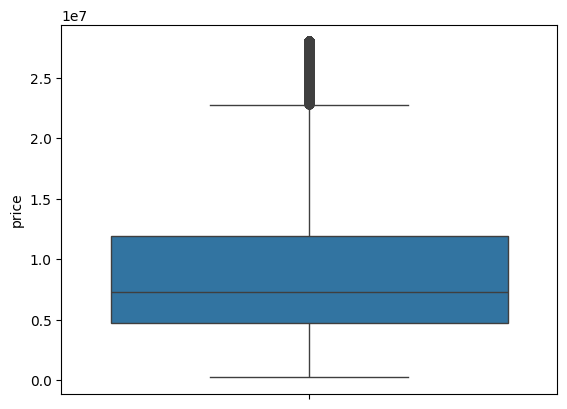

In [13]:
sns.boxplot(df_no_outliers['price'] )

In [14]:
X = df_no_outliers.drop(columns = ['price','construction_status','new_resale','value_per_sqft'],axis=1)
Y = df_no_outliers['price']

In [15]:
X

,locality_name,region_name,area,house_type,total_rooms,total_beds,age
0,Tarwala Nagar,Nashik,2260,Apartment,6,4,1.0
1,Dombivali,Mumbai,500,Apartment,4,2,0.0
2,Wagholi,Pune,773,Apartment,5,3,3.0
3,Ambegaon Budruk,Pune,477,Apartment,3,1,0.5
4,Dombivali,Mumbai,917,Apartment,5,3,3.0
...,...,...,...,...,...,...,...
191269,Pirangut,Pune,947,Apartment,5,3,4.0
191270,Pirangut,Pune,448,Apartment,3,1,4.0
191271,Pirangut,Pune,1887,Independent House,6,4,4.0
191272,Pirangut,Pune,768,Apartment,5,3,4.0


In [16]:
Y

0          8499000.0
1          6790000.0
2          6030000.0
3          3537000.0
4          9500000.0
             ...    
191269     8060000.0
191270     4000000.0
191271    16800000.0
191272     7500000.0
191273     6583000.0
Name: price, Length: 174807, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score 


In [18]:
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.2, random_state=2)

In [19]:
y_test

127039     7181000.0
69953      6899000.0
83493      2100000.0
65791      3799000.0
121050     6494000.0
             ...    
160906     6184000.0
33978     19400000.0
161676     6299000.0
20138      3500000.0
110552     5800000.0
Name: price, Length: 34962, dtype: float64

In [20]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore",sparse_output=False), ['locality_name', 'region_name', 'house_type']),  
    remainder="passthrough"
)

In [21]:
scalar=StandardScaler()

In [70]:
lr=LinearRegression()
pipe=make_pipeline(column_trans,scalar,lr)

In [71]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['locality_name',
                                                   'region_name',
                                                   'house_type'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [73]:
y_pred_lr=pipe.predict(x_test)

In [74]:
r2_score(y_test,y_pred_lr)

-5.121566058930973e+17

In [76]:
lasso=Lasso()
pipe=make_pipeline(column_trans,scalar,lasso)
pipe.fit(x_train,y_train)
y_pred_la=pipe.predict(x_test)
r2_score(y_test,y_pred_la)

c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.960e+17, tolerance: 4.946e+14
  model = cd_fast.enet_coordinate_descent(


0.7895285036045785

In [78]:
ridge=Ridge()
pipe=make_pipeline(column_trans,scalar,ridge)
pipe.fit(x_train,y_train)
y_pred_ri=pipe.predict(x_test)
r2_score(y_test,y_pred_ri)


0.7895645696825112

In [22]:
from sklearn.ensemble import RandomForestRegressor
random=RandomForestRegressor()



In [23]:
pipe=make_pipeline(column_trans,scalar,random)
pipe.fit(x_train,y_train)

c:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['locality_name',
                                                   'region_name',
                                                   'house_type'])])),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [24]:
y_pred_ra=pipe.predict(x_test)
r2_score(y_test,y_pred_ra)

0.9115748288508024

In [25]:
import joblib
joblib.dump(pipe, 'RandomForestModel.pkl', compress=9)


['RandomForestModel.pkl']